<a href="https://colab.research.google.com/github/Elman295/Paper_with_code/blob/main/Classification_of_Image_using_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = tf.keras.datasets.cifar10 

(x_train, y_train), (x_test, y_test) = data.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
print(x_train.shape) 
print(x_train.dtype) 
print(y_train.shape) 
print(y_train.dtype)

(50000, 32, 32, 3)
uint8
(50000, 1)
uint8


In [4]:
x_train, x_test = tf.cast(x_train, dtype = tf.float32), tf.cast(x_test, dtype = tf.float32) 
y_train, y_test = tf.cast(y_train, dtype = tf.float32), tf.cast(y_test, dtype = tf.float32) 

In [5]:
print(x_train.shape) 
print(x_train.dtype) 
print(y_train.shape) 
print(y_train.dtype)

(50000, 32, 32, 3)
<dtype: 'float32'>
(50000, 1)
<dtype: 'float32'>


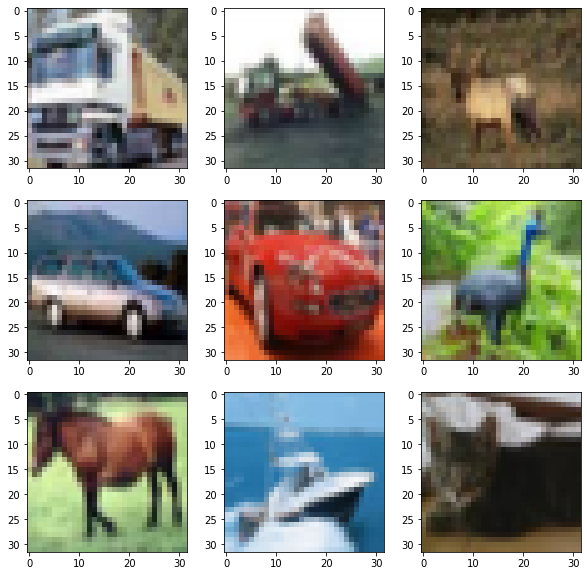

In [6]:
plt.figure(figsize=(10,10)) 

for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(x_train[i].numpy().astype("uint8")) 

plt.show()

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
optimizer_fn = tf.keras.optimizers.SGD(learning_rate=0.0001) 

In [8]:
class Model(tf.keras.models.Model):
  def __init__(self):
    super(Model,self).__init__()
    self.PrerocessLayer = tf.keras.layers.Rescaling(scale = 1./127.5, offset=-1) 
    self.layer_1 = tf.keras.layers.Conv2D(32,(5,5),activation = "relu")
    self.layer_2 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2))
    self.layer_3 = tf.keras.layers.Conv2D(32,(5,5),activation = "relu")
    self.layer_4 = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides = (2,2))
    self.layer_5 = tf.keras.layers.Conv2D(64,(5,5),activation = "relu")
    self.flatten = tf.keras.layers.Flatten() 
    self.layer_6 = tf.keras.layers.Dense(units = 10, activation = "softmax") 


  def call (self,x):
    x = self.PrerocessLayer(x)
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.layer_3(x)
    x = self.layer_4(x)
    x = self.layer_5(x) 
    x = self.flatten(x) 
    logits = self.layer_6(x)

    return logits

In [9]:
model = Model() 
print(model(x_train[0].numpy().reshape(1,32,32,3), training = False))

tf.Tensor(
[[0.10388619 0.10018847 0.09977055 0.10084903 0.10513517 0.10405295
  0.1066093  0.08985837 0.09593792 0.09371197]], shape=(1, 10), dtype=float32)


In [10]:
train_accuracy = tf.metrics.SparseTopKCategoricalAccuracy(name = "train_accuracy")
test_accuracy = tf.metrics.SparseTopKCategoricalAccuracy(name = "test_accuracy")

train_loss = tf.metrics.Mean(name = "train_loss")
test_loss = tf.metrics.Mean(name = "test_loss")

In [11]:
@tf.function
def train_step(image,label):

  with tf.GradientTape() as tape:

    y_pred = model(image, training = True) 
    loss = loss_fn(label, y_pred) 
    gradient = tape.gradient(loss, model.trainable_variables)
    optimizer_fn.apply_gradients(zip(gradient, model.trainable_variables))

  train_accuracy(label, y_pred)
  train_loss(loss)

In [12]:
@tf.function
def test_step(image, label):

  y_pred = model(image, training = False) 
  loss = loss_fn(label, y_pred) 

  test_accuracy(label, y_pred) 
  test_loss(loss)

In [13]:
train_ds = tf.data.Dataset.from_tensor_slices(tensors = (x_train, y_train)).batch(60) 
test_ds =  tf.data.Dataset.from_tensor_slices(tensors = (x_test, y_test)).batch(60)

In [15]:
EPOCHS = 300 

train = []

test = []

for i in range(EPOCHS):

  train_accuracy.reset_states()
  train_loss.reset_states()

  test_accuracy.reset_states()
  test_loss.reset_states()

  for img, lbl in train_ds:
    train_step(img,lbl)
    train.append(train_accuracy.result()) 

  for img,lbl in test_ds:
    test_step(img,lbl) 
    test.append(test_accuracy.result()) 


  print(f"epochs {i+1}")
  print(f"train_accuracy = {train_accuracy.result()}")
  print(f"test_accuracy = {test_accuracy.result()}")
  print(f"train_loss = {train_loss.result()}")
  print(f"test_loss = {test_accuracy.result()}")
  print("--------------------------------------------------------")

  


epochs 1
train_accuracy = 0.5776000022888184
test_accuracy = 0.5877000093460083
train_loss = 2.2938485145568848
test_loss = 0.5877000093460083
--------------------------------------------------------
epochs 2
train_accuracy = 0.5918599963188171
test_accuracy = 0.6011999845504761
train_loss = 2.289581298828125
test_loss = 0.6011999845504761
--------------------------------------------------------
epochs 3
train_accuracy = 0.6039199829101562
test_accuracy = 0.6122000217437744
train_loss = 2.285108804702759
test_loss = 0.6122000217437744
--------------------------------------------------------
epochs 4
train_accuracy = 0.6161800026893616
test_accuracy = 0.6238999962806702
train_loss = 2.2803213596343994
test_loss = 0.6238999962806702
--------------------------------------------------------
epochs 5
train_accuracy = 0.628279983997345
test_accuracy = 0.6322000026702881
train_loss = 2.2751190662384033
test_loss = 0.6322000026702881
--------------------------------------------------------
epo

In [16]:
len(train)

250200

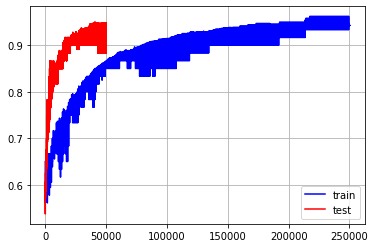

In [18]:
plt.plot(train, color = "blue", label = "train")
plt.plot(test, color = "red", label = "test")
plt.legend()
plt.grid() 
plt.show()